<a href="https://colab.research.google.com/github/Rellik-7/GRIP-August/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Suvayan Nath

#TASK 1 GRIP AUGUST

#Importing Packages

In [139]:
import numpy as np
import pandas as pd
import plotly.express as px

#Loading the Dataset

In [140]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#EDA

In [141]:
df.count()

Hours     25
Scores    25
dtype: int64

In [142]:
fig = px.scatter(df, x="Hours",y="Scores",title="Scatter Pot for Scores vs Hours",width=1200)
fig.show()

In [143]:
fig = px.bar(df, x="Hours",y="Scores",title="Bar Plot for Scores vs Hours",width=800,color="Scores")
fig.show()

In [144]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [145]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [146]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


#Outlier Detection

In [147]:
fig = px.box(df,y="Scores",title="Box Plot for Scores",points="all")
fig.show()

In [148]:
fig = px.box(df,y="Hours",title="Box Plot for Hours",points="all")
fig.show()

#Splitting the Data

In [149]:
from sklearn.model_selection import train_test_split
X,y=df.iloc[:,[0]].values,df.iloc[:,1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


#LR Model Training

In [150]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
print(f"The line is:  y = {round(linreg.coef_[0],3)}x + {round(linreg.intercept_,3)}")

The line is:  y = 10.064x + 0.69


In [151]:
y_pred = linreg.predict(X)
y_pred

array([25.85023789, 52.01739661, 32.89524216, 86.23598878, 35.91452971,
       15.78594608, 93.28099305, 56.04311333, 84.22313041, 27.86309625,
       78.18455533, 60.06883006, 45.97882152, 33.90167134, 11.76022935,
       90.2617055 , 25.85023789, 19.8116628 , 62.08168842, 75.16526778,
       27.86309625, 48.99810906, 38.93381725, 70.13312187, 79.19098451])

In [152]:
y_test_pred = linreg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
df 

,Actual,Predicted
0,30,25.850238
1,76,70.133122
2,17,11.760229
3,35,38.933817
4,88,93.280993
5,62,60.068830
6,60,56.043113
7,81,84.223130


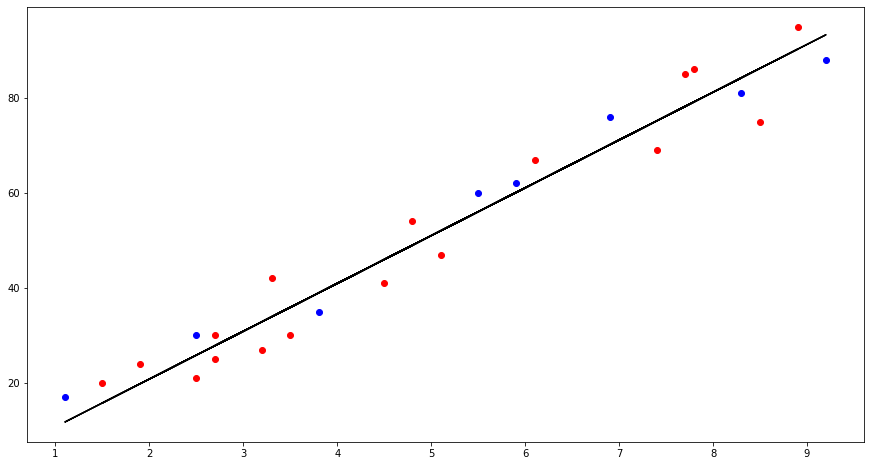

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.scatter(X_test,y_test,c='b')
plt.scatter(X_train,y_train,c='r')
plt.plot(X,y_pred,c='k')
plt.show()

#Evaluating Model Performance

In [154]:
from sklearn.metrics import mean_absolute_error
print(f'The mean absolute error on training set is: {mean_absolute_error(linreg.predict(X_train),y_train)}')
print(f'The mean absolute error on testing set is: {mean_absolute_error(linreg.predict(X_test),y_test)}')

The mean absolute error on training set is: 5.520068317677199
The mean absolute error on testing set is: 4.19780102476516


#Score Prediction for 9.25 hours of study

In [155]:
print(f'The Score for 9.25 hours of study is: {linreg.predict([[9.25]])[0]}')

The Score for 9.25 hours of study is: 93.78420763694035
